 # Project 1

### Challenge 1

In [134]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [3]:
data_1_path = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_200919.txt'
data_2_path = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_200912.txt'
data_3_path = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_200905.txt'
data_4_path = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_200829.txt'

In [4]:
df1 = pd.read_csv(data_1_path)
df2 = pd.read_csv(data_2_path)
df3 = pd.read_csv(data_3_path)
df4 = pd.read_csv(data_4_path)

In [5]:
df1.shape, df2.shape, df3.shape, df4.shape

((209661, 11), (210585, 11), (208051, 11), (217832, 11))

In [6]:
mta_df = pd.concat([df1, df2, df3, df4])

mta_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/12/2020,00:00:00,REGULAR,7457064,2535856
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/12/2020,04:00:00,REGULAR,7457067,2535861
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/12/2020,08:00:00,REGULAR,7457078,2535876
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/12/2020,12:00:00,REGULAR,7457119,2535920
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/12/2020,12:00:00,RECOVR AUD,26786,4009


In [7]:
mta_df.shape

(846129, 11)

### Challenge 2

In [8]:
# Adding date-time column
mta_df["DATE_TIME"] = pd.to_datetime(mta_df['DATE'] + ' ' + mta_df['TIME'])

mta_df[['DATE_TIME']]

In [13]:
mta_df['DATE_TIME'].dtype

dtype('<M8[ns]')

### Challenge 3

In [16]:
# finding all unique turnstiles

mta_df['Turnstile'] = mta_df['C/A'] + ' ' + mta_df['UNIT'] + ' ' + mta_df['SCP'] + ' ' + mta_df['STATION']

In [17]:
(mta_df['Turnstile']).value_counts()

N343 R019 00-05-00 JAMAICA 179 ST     583
N343 R019 00-05-01 JAMAICA 179 ST     583
N343 R019 00-00-00 JAMAICA 179 ST     582
N343 R019 00-00-09 JAMAICA 179 ST     582
N343 R019 00-00-0A JAMAICA 179 ST     582
                                     ... 
R138 R293 00-05-01 34 ST-PENN STA       2
R138 R293 00-05-00 34 ST-PENN STA       2
R627 R063 00-03-05 SUTTER AV-RUTLD      1
PTH20 R549 03-00-08 NEWARK HM HE        1
R125 R189 00-10-01 CHRISTOPHER ST       1
Name: Turnstile, Length: 4978, dtype: int64

In [108]:
t_d_grouped_df_2 = mta_df.groupby(['Turnstile', 'DATE'], as_index = False).sum()

# t_d_grouped_df_2 = turnstile_date_grouped_df.sum()

t_d_grouped_df_2.head()

,Turnstile,DATE,ENTRIES,EXITS
0,A002 R051 02-00-00 59 ST,08/22/2020,44687289,15193417
1,A002 R051 02-00-00 59 ST,08/23/2020,44688978,15194051
2,A002 R051 02-00-00 59 ST,08/24/2020,44690684,15194835
3,A002 R051 02-00-00 59 ST,08/25/2020,44693549,15195987
4,A002 R051 02-00-00 59 ST,08/26/2020,44696514,15197069


In [109]:
t_d_grouped_df_2['non_cum_entries'] = t_d_grouped_df_2['ENTRIES'].diff()

In [110]:
t_d_grouped_df_2.head()

,Turnstile,DATE,ENTRIES,EXITS,non_cum_entries
0,A002 R051 02-00-00 59 ST,08/22/2020,44687289,15193417,NaN
1,A002 R051 02-00-00 59 ST,08/23/2020,44688978,15194051,1689.0
2,A002 R051 02-00-00 59 ST,08/24/2020,44690684,15194835,1706.0
3,A002 R051 02-00-00 59 ST,08/25/2020,44693549,15195987,2865.0
4,A002 R051 02-00-00 59 ST,08/26/2020,44696514,15197069,2965.0


In [111]:
# Adding cumulative exits column

t_d_grouped_df_2['non_cum_exits'] = t_d_grouped_df_2[t_d_grouped_df_2.columns[3]].diff()

In [112]:
t_d_grouped_df_2.head()

,Turnstile,DATE,ENTRIES,EXITS,non_cum_entries,non_cum_exits
0,A002 R051 02-00-00 59 ST,08/22/2020,44687289,15193417,NaN,NaN
1,A002 R051 02-00-00 59 ST,08/23/2020,44688978,15194051,1689.0,634.0
2,A002 R051 02-00-00 59 ST,08/24/2020,44690684,15194835,1706.0,784.0
3,A002 R051 02-00-00 59 ST,08/25/2020,44693549,15195987,2865.0,1152.0
4,A002 R051 02-00-00 59 ST,08/26/2020,44696514,15197069,2965.0,1082.0


### Challenge 4

In [123]:
# Getting a single turnstile

one_turn = t_d_grouped_df_2[t_d_grouped_df_2['Turnstile'] == 'A002 R051 02-00-00 59 ST']


one_turn.head(30)

,Turnstile,DATE,ENTRIES,EXITS,non_cum_entries,non_cum_exits
0,A002 R051 02-00-00 59 ST,08/22/2020,44687289,15193417,NaN,NaN
1,A002 R051 02-00-00 59 ST,08/23/2020,44688978,15194051,1689.0,634.0
2,A002 R051 02-00-00 59 ST,08/24/2020,44690684,15194835,1706.0,784.0
3,A002 R051 02-00-00 59 ST,08/25/2020,44693549,15195987,2865.0,1152.0
4,A002 R051 02-00-00 59 ST,08/26/2020,44696514,15197069,2965.0,1082.0
5,A002 R051 02-00-00 59 ST,08/27/2020,44699319,15198274,2805.0,1205.0
6,A002 R051 02-00-00 59 ST,08/28/2020,44702445,15199547,3126.0,1273.0
7,A002 R051 02-00-00 59 ST,08/29/2020,44705127,15200485,2682.0,938.0
8,A002 R051 02-00-00 59 ST,08/30/2020,44706856,15201071,1729.0,586.0
9,A002 R051 02-00-00 59 ST,08/31/2020,44708630,15201988,1774.0,917.0


### anomalies present at DATE = 09/12/2020 and 09/13/2020

In [114]:

one_turn.dropna(axis = 0, inplace = True)

<ipython-input-114-898d9559cd16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_turn.dropna(axis = 0, inplace = True)


<AxesSubplot:xlabel='DATE'>

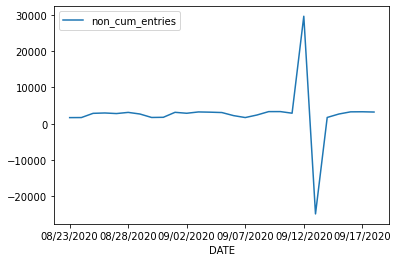

In [116]:
one_turn.plot('DATE', 'non_cum_entries')

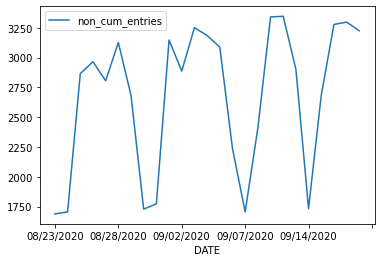

In [124]:
# removing anomalies

mask = (one_turn['non_cum_entries'] > 0) & (one_turn['non_cum_entries'] < 5000)

one_turn.loc[mask].plot('DATE', 'non_cum_entries');

In [130]:
# How many outliers are there?

one_turn['non_cum_entries'].value_counts()

 1706.0     2
 2682.0     2
 3224.0     1
 3250.0     1
 2865.0     1
 2965.0     1
 2805.0     1
 3126.0     1
 1729.0     1
 1774.0     1
 3147.0     1
 2886.0     1
 3185.0     1
 3297.0     1
 3087.0     1
 2239.0     1
 2407.0     1
 3340.0     1
 3346.0     1
 2903.0     1
-24800.0    1
 1734.0     1
 29573.0    1
 3277.0     1
 1689.0     1
Name: non_cum_entries, dtype: int64

In [135]:
plt.figure(figsize=(10,3))
plt.plot(one_turn['DATE'], one_turn['non_cum_entries'])

TypeError: 'module' object is not callable